In [2]:
import os
import sys
from collections import Counter
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [11]:
data_path = "/home/jovyan/work/data/"
sys.path.append(data_path)

In [12]:
test = pd.read_csv(f'{data_path}/test.csv')

In [13]:
train_master = pd.read_csv(f'{data_path}/train.csv')

In [14]:
tests = glob(f'{data_path}/test/*')

In [15]:
with open(tests[0], 'r') as f:
    print(f.read())

Making choices in life can be very difficult. People often ask for advice when they can not decide on one thing. It's always good to ask others for their advice when making a choice. When you have multiple opinions you have the ability to make the best choice for yourself. Seeking multiple opinions can help a person make a better choice because it can decrease stress levels, a great chance to learn something new, can be very helpful and beneficial.

To begin with, Seeking information from more than one person can decrease stress levels. When making a decision there is a chance that you can become very stressed and overwhelmed. Being stressed can cause a person to give up on what they are doing. Having multiple opinions from people can make choosing an option less difficult and more easier. The information that you receive from others may have a special meaning in the future. Other peoples opinion can make a person feel confident in making the right choice.

When you ask other people fo

In [16]:
train_master.discourse_effectiveness.value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

In [23]:
train_master.discourse_type.value_counts() * 100 / len(train_master)

Evidence                32.925337
Claim                   32.577179
Position                10.945192
Concluding Statement     9.114647
Lead                     6.231470
Counterclaim             4.822521
Rebuttal                 3.383653
Name: discourse_type, dtype: float64

In [18]:
words = train_master["discourse_text"].str.split(' ')
train_master["text_length"] = words.apply(len)

(array([2.4044e+04, 7.4100e+03, 3.0390e+03, 1.2530e+03, 5.6200e+02,
        2.3600e+02, 9.4000e+01, 5.9000e+01, 3.2000e+01, 1.1000e+01,
        7.0000e+00, 7.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2.  ,  43.45,  84.9 , 126.35, 167.8 , 209.25, 250.7 , 292.15,
        333.6 , 375.05, 416.5 , 457.95, 499.4 , 540.85, 582.3 , 623.75,
        665.2 , 706.65, 748.1 , 789.55, 831.  ]),
 <BarContainer object of 20 artists>)

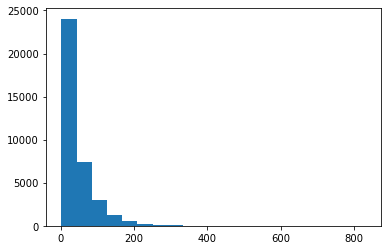

In [19]:
plt.hist(train_master["text_length"], bins=20)

In [20]:
train_master["text_length"].describe()

count    36765.000000
mean        45.721637
std         46.641451
min          2.000000
25%         17.000000
50%         29.000000
75%         58.000000
max        831.000000
Name: text_length, dtype: float64

In [21]:
specific_word = '\\n'
text_specific_word = train_master[train_master.discourse_text.str.contains(specific_word)].discourse_text
text_specific_word.to_csv(data_path+ "EDA/specific_word.csv")

In [22]:
effectiveness = "Ineffective"
text_effectiveness = train_master[train_master.discourse_effectiveness==effectiveness].head(100)
text_effectiveness.to_csv(data_path+"EDA/effectiveness.csv")